<a href="https://colab.research.google.com/github/TemrinaDarya/turbines-2022/blob/hw1/TemrinaDarya_hw_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задача 1
Построить график зависимости термического КПД паротурбинного цикла без промежуточного перегрева пара при следующих параметрах пара: P0 = 5, 10, 15, 20 MPa. Для каждого значения взять следующие значения температуры t0 = 300, 350, 400, 450, 500 градусов Цельсия, Pk = 5 kPa. Принять давление за последней ступенью паровой турбины P2 = Pk. Термический КПД цикла оценивать без учета подогрева воды в питательном насосе и регенеративной системе.

In [ ]:
!pip install iapws
import matplotlib.pyplot as plt
import numpy as np
import iapws
from iapws import IAPWS97 as gas
from typing import Optional, Tuple, List, Union

point_type = iapws.iapws97.IAPWS97
MPa = 10 ** 6
kPa = 10 ** 3
unit = 1 / MPa
to_kelvin = lambda x: x + 273.15 if x else None

def check_is_valid_numerical(values: List[Union[None, float]]) -> None:

    for value in values:
        if value:
            if not isinstance(value, (int, float)):
                raise ValueError(f"Argument should be int or float value! Given {type(value)}")

def construct_cycle_points(
    p_0: Union[int, float],
    p_k: Union[int, float],
    t_0: Optional[Union[int, float]] = None,
    x_0: Optional[Union[int, float]] = None, 
) -> Tuple[point_type, point_type, point_type]:

    check_is_valid_numerical([p_0, p_k, t_0, x_0])
    if not t_0 and not x_0:
        raise ValueError("Neither t_0 not x_0 is not provided for start expansion point!")
    if not (p_0 and p_k):
        raise ValueError("P_0 and p_k must be specified!")
    if x_0 and (x_0 > 1 or x_0 < 0):
        raise ValueError("x_0 should be between 0 and 1")
        
    if t_0:
        point_0 = gas(P=p_0, T=t_0)
    else:
        point_0 = gas(P=p_0, x=x_0)
    
    p_condenser = gas(P=p_k, s=point_0.s)
    p_pump = gas(P=p_k, x=0)
    
    return point_0, p_condenser, p_pump


def compute_cycle_efficiency(p_0: point_type, p_condenser: point_type, p_pump: point_type) -> float:
 
    useful_energy = p_0.h - p_condenser.h
    full_energy = p_0.h - p_pump.h
    efficiency = useful_energy / full_energy * 100
    return efficiency

def solve_exercise(
    p_0: Union[int, float],
    p_k: Union[int, float],
    t_0: Optional[Union[int, float]] = None,
    x_0: Optional[Union[int, float]] = None,) -> float:
  
    point_0, p_condenser, p_pump = construct_cycle_points(
        p_0=p_0 * unit,
        p_k=p_k * unit,
        t_0=to_kelvin(t_0),
        x_0=x_0
    )

    efficiency = compute_cycle_efficiency(p_0=point_0, p_condenser=p_condenser, p_pump=p_pump)
    
    return efficiency


Задача 2 Построить график зависимости термического КПД паротурбинного цикла без промежуточного перегрева пара при следующих параметрах пара: P0 = 5 MPa, t0 = 450 градусов Цельсия, Pk = 5, 10, 15, 20, 50 kPa. Принять давление за последней ступенью паровой турбины P2 = Pk. Термический КПД цикла оценивать без учета подогрева воды в питательном насосе и регенеративной системе.

In [ ]:
# Начальные параметры:

def task_1(start_temp, t_step, t_steps, p_steps, p_start, p_step):
  p_k = [5 * kPa for _ in range(p_steps)]
  p_list = [[p_start + i * p_step for _ in range(p_steps)] for i in range(t_steps)]

  temp_list = [start_temp + i * t_step for i in range(t_steps)]
  t_0 = [to_kelvin(t) for t in temp_list]

  efficiency = [list(map(solve_exercise, p_list[i], p_k, t_0)) for i in range(t_steps)]

  X = np.array(p_list)
  Y = np.array(efficiency)

  plt.plot(X,Y)
  plt.grid(True)
  plt.title('График зависимости термического КПД от P0')
  plt.ylabel('КПД')
  plt.xlabel('P0')
  plt.legend([f'{t} °C' for t in temp_list])
  plt.show()

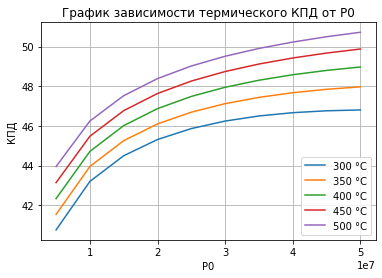

In [ ]:
task_1(300, 50, 10, 5, 5 * MPa, 5 * MPa)


In [ ]:
# Начальные параметры:

def task_2(steps, p_start, p_step,p_00, temperature):
  p_0 = [p_00 for _ in range(steps)]
  p_k0 = [p_start + i * p_step for i in range(steps)]
  temp_kel = to_kelvin(temperature)
  t_0 = [temp_kel for _ in range(steps)]

  efficiency5Mpa = list(map(solve_exercise, p_0, p_k0, t_0))

  print("Ответ на задачу 1.2:", efficiency5Mpa)

  X = np.array(p_k0)
  Y = np.array(efficiency5Mpa)

  plt.plot(X,Y)
  plt.grid(True)
  plt.title('График зависимости термического КПД от Pk')
  plt.ylabel('КПД')
  plt.xlabel('Pk')
  plt.legend([f'{temperature} °C'])
  plt.show()


Ответ на задачу 1.2: [43.13716841557481, 41.34900158661684, 40.22403231473411, 39.38654676617682, 38.712765703556336, 38.14564747009683, 37.65394895893681, 37.218608740747136, 36.827099421813834, 36.47072568125424]


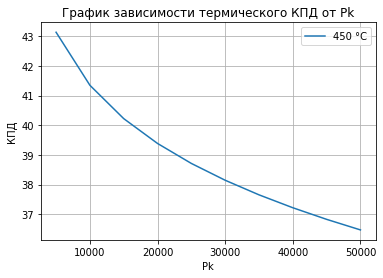

In [ ]:
steps = 10
p_start = 5 * kPa
p_step = 5 * kPa
p_00 = 5  * MPa
temperature = 450 

task_2(steps, p_start, p_step, p_00, temperature)
